# <span style=" display: block; text-align: center; color: #FFFFFF; padding: 0.4em 0.5em;background: #303030;">  Feature extraction  </span>





You can get the data we will use by the following code. After running this code, you will have a directory, called featureextraction, on the left side of your screen.

In [ ]:
!git clone https://gitlab-student.centralesupelec.fr/Catherine.Soladie/featureextraction.git

Cloning into 'featureextraction'...
remote: Enumerating objects: 48, done.
remote: Total 48 (delta 0), reused 0 (delta 0), pack-reused 48
Unpacking objects: 100% (48/48), 1.92 MiB | 1.79 MiB/s, done.


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy

# Introduction

Many pipelines of image processing need a step of Feature Extraction. 

>An image processing pipeline is most of the time composed of pretreatment, feature extraction, processing (clustering, classification, regression, …)

Here, we will experiment this step through an example using images of trees and sea, such as those in the directory featureextraction.

![LotsOfImagesTreesAndSea.png](https://drive.google.com/uc?id=1e5hDi5LDWSOzdzD8A_QXLAP8PPBzQw8x)


As human beeings, you can easily classify (we may say cluster) those images into 2 groups. Let's see what a basic automatic system can do !


The goal of this applied course is for you to experiment a hand-crafted feature extractor that can be used to cluster images efficiently. **Though this applied course, you will understand the role of feature extraction in general data analysis pipeline.**

To that purpose, you will cluster images from forests and from sea into 2 clusters. This will be made by a 2 steps pipeline:

<it><ul>- feature extraction (using LBP)</ul>
    <ul>- clustering (using k-means)</ul> </it>
    
<p/>
You will code this pipeline in python step by step in the following (sub)sections. The goal of this applied course, is not to be able to code in python, but to understand the various steps, how to verify them, which questions you should ask yourself when creating such pipeline, ...

To help you, you will have code to fill in, solutions if you want, and more important questions to verify each step and **your understanding of the data analysis**. 

For the first section, we will focus on a single image, to understand the pattern extraction. Whatever image is fine. Choose the one you want!

Now you have everything to start! 



# <span style="padding: 0.4em 0.5em; color: #494949; background: #f4f4f4; border-left: solid 5px #7db4e6; border-bottom: solid 3px #d7d7d7;">1. Applying LBP on an image</span>

Local Binary Pattern is a usefull feature extractor to get relevant information about patterns that compose an image or a subpart of an image (called cell). 

In this applied course, we will consider images with one main information such as a picture of a forest or a picture of the sea (possibly with sky), so that we won't need to cut the images into different cells. The LBP histogram will be computed on the whole image. To say ot differently, there will be just one cell for an image (the cell is the whole image).



## <span style="border-bottom: double 5px #7db4e6; color: #494949;">1.1. Visualisation tool for LBP pattern</span>

>**When you decide to use a hand-crafted feature extractor, make sure you understand the feature via a visualisation tool. Moreover, you will certainly need this visualisation tool later to understand which features are extracted for the images of your database.**

You will use LBP for feature extraction. Each LBP computation associates one integer between 0 and 255 to an onther integer between 0 and 255, which corresopnd to a pattern in a 3*3 matrix and vice versa.

To be able to understand which pattern are more likely to appear in one image, having **a visualization tool** of a pattern can be efficient.

Fullfill the function <code>def pattern (i)</code> that draws the LBP pattern from an integer <code>i</code>.

For instance, for the value <code>i=151</code>, the binary information is 10010111, so that the pattern is:

![LBP151Example2.png](https://drive.google.com/uc?id=1jagH4WhN0yFYpdMIWlquoIbYH_biUut5)


The function should return the following matrix:

[[1. 1. 1.]

 [1. 0. 0.]

 [0. 0. 1.]]

 The number in the middle is set to 0 by convenience.



In [ ]:
#-------------------------------
# FUNCTIONS
#-------------------------------
# 1.1 Plot a pattern (i value is between 0 and 255)
def pattern (i) :
    pattern_matrix = np.zeros((3,3))
    pattern_matrix[0][0]=i%2
    i = i // 2
    pattern_matrix[0][1]=i%2
    i = i // 2
    pattern_matrix[0][2]=i%2
    i = i // 2
    pattern_matrix[1][2]=i%2
    i = i // 2
    pattern_matrix[2][2]=i%2
    i = i // 2
    pattern_matrix[2][1]=i%2
    i = i // 2
    pattern_matrix[2][0]=i%2
    i = i // 2
    pattern_matrix[1][0]=i%2
    return pattern_matrix


<details>
  <summary> Hint </summary>
  You can use <code>i%2</code> to get the rest of the Euclidean division by 2 (last digit of the binary information), and <code>i//2</code> to divide by 2 (eliminate the last digit of the binary information).

</details>
<details>
  <summary> Hint 2 </summary>
The line <code>pattern_matrix[0][0]=i%2</code> puts <code>1</code> in the cell of the matrix if the last digit of the binary information is <code>1</code>, and <code>0</code> otherwise. 
For instance, in 151 (10010111), the last digit is 1. <code>i%2=1</code>, which is set into the first cell of the matrix <code>pattern_matrix[0][0]</code>.
The line <code> i = i // 2 </code> remove the last digit of the binary information. For instance, in 151 (10010111), the new value for <code>i</code> is 75 (1001011).
</details>
<details>
  <summary> Hint 3 </summary>
Make sure you set the right cell <code>pattern_matrix[i][j]</code> for each digit of the binary information ;) 
</details>

[Go to one solution](#solution_1)
<a name="back_1"></a>


Verify on different numbers with the code:





In [ ]:
#-------------------------------
# 1.1 LBP: Local Binary Pattern
#-------------------------------
# From an interger between 0 and 255, plot the corresponding pattern
patternNumber = 151
print("")
print("The pattern for " + str(patternNumber) + " is:")
print(pattern(patternNumber))


The pattern for 151 is:
[[1. 1. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


Now you have a visualization tool that can help you visualise a LBP pattern. A LBP pattern is a value between 0 and 255 (8 digits 0 or 1). Now, lets see how to computer the LBP values of an image.

<div id="back_2a"/>

## Try to guess
    
    
Which are the LBP values that you expect having most for forest images, and for sea images?

Do you then think that it is possible to differentiate forst iamge from sea images easily?




[Go to one solution](#solution_1_1)
<a name="back_1_1"></a>

## <span style="border-bottom: double 5px #7db4e6; color: #494949;">1.2. LBP computation on an image
</span>

From that point, you can use a toolbox or code the feature extrator. In this applied course, you will code it (just a few lines of code). 

And to verify your code, you will test in on imSynth.bmp.

The algorithm is the folowwing one : for each 3*3 patch of the image, replace the value in the middle by its LBP value (between 0 and 255):

![LBPPipeline.png](https://drive.google.com/uc?id=12MBtpuQx-0yJVWBEA0q_ZSad4qnENnO1)




In [ ]:
# 1.2 LBP computation on an image
def lbp (img) :
    img_lbp = np.zeros((len(img)-2, len(img[0])-2))
    for i in range (1, len(img)-1):
        for j in range(1, len(img[0])-1):
            val = 0
            if (img[i-1][j-1]>=img[i][j]): val = val+2**0
            if (img[i-1][j]>=img[i][j]): val = val+2**1
            if (img[i-1][j+1]>=img[i][j]): val = val+2**2
            if (img[i][j-1]>=img[i][j]): val = val+2**7
            if (img[i][j+1]>=img[i][j]): val = val+2**3
            if (img[i+1][j-1]>=img[i][j]): val = val+2**6
            if (img[i+1][j]>=img[i][j]): val = val+2**5
            if (img[i+1][j+1]>=img[i][j]): val = val+2**4
            img_lbp[i-1][j-1] = val
    return img_lbp

<details>
  <summary> Hint </summary>
  The LBP value is between 0 and 255 and is the sum of <code>x_0*1 + x_1^1*2 + x_2*4 + x_3*8 + x_4*16 + x_5*32  + x_6*64  + x_7*128 </code>
</details>
<details>
  <summary> Hint 2</summary>
  You can use <code>2**k</code> to change one digit of the binary information. For instance, <code>2**4 = 1000 (binary) </code>

</details>

[Go to one solution](#solution_1_2)
<a name="back_1_2"></a>

Try to guess before running the code.

<b>What happend if we draw the LBP image of imSynth.bmp ?</b>

<div>
  <input type="checkbox">
  <label>We can see the edges of the original image appear, for the patterns on the edges are the same.</label>
</div>

<b>What happend if we draw the LBP image of forest1.jpg ?</b>

<div>
  <input type="checkbox">
  <label>We can see the edges of the trunc of the tree appear, for the patterns on the edge of the trunc are the same.</label>
</div>

<b>What happend if we draw the LBP image of sea1.jpg ?</b>

<div>
  <input type="checkbox">
  <label>We can see the waves of the sea appear, for the local patterns on the waves are the same.</label>
</div>


Draw the original image and the corresponding LBP image to verify.


The image is 259 pixels wide and 194 pixels high.
The LBP image is 257 pixels wide and 192 pixels high.
The min value is 0.0 the max value is 255.0


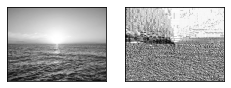

In [ ]:
#-------------------------------
# 1.2 LBP IMAGE
#-------------------------------
img = cv2.imread('/content/featureextraction/imsynth.bmp',cv2.IMREAD_GRAYSCALE) # read the image
img = cv2.imread('/content/featureextraction/sea1.jpg',cv2.IMREAD_GRAYSCALE) # read the image
#img = cv2.imread('/content/featureextraction/forest1.jpg',cv2.IMREAD_GRAYSCALE) # read the image
print("")
print("The image is " + str(len(img[0])) + " pixels wide and " + str(len(img)) + " pixels high.")

img_lbp=lbp(img)
print("The LBP image is " + str(len(img_lbp[0])) + " pixels wide and " + str(len(img_lbp)) + " pixels high.")
print("The min value is " + str(np.min(img_lbp)) + " the max value is " + str(np.max(img_lbp)))
plt.subplot(1, 3,1),plt.imshow(img, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3,2),plt.imshow(img_lbp, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.show()



Did you guess correctly?

What happend if you run the code on a real image, a sea or a forest image for instance (replace the path and the name by the image you have chosen)? How can you explain it?

[Go to one solution](#solution_1_2b)
<a name="back_1_2b"></a>

## <span style="border-bottom: double 5px #7db4e6; color: #494949;">1.3. LBP histogram</span>

In our use case, we want to cluster sea and forest images. 

A LBP image gives local information of patterns. If the image has one main information located everywhere on the image, which is the case in a forest image for instance, it makes sense to compute the histogram of the LBP image on the whole image, that is to say, how many times LBP number 1 appears, how many times LBP 2 appears, ... Well a histogram corresponding the number of times each LBP patterns appear.

Fullfill the method hist to compute the histogram on a LBP image and add it to your plot.

<details>
  <summary> What will be the size of the histogram for a 16*16 image ? </summary>
 256
 </details>
 <details>
 <summary> What will be the size of the histogram for a 1000*1000 image ? </summary>
 256 as well, for there are exactly 256 patterns. Note that this is interesting for you do not need (well, at least technically...) to resize the image to be able to compare them.
</details>

In [ ]:
# 1.3 Histogram computation
def histo (img) :
    valhisto = np.zeros((256,1))
    size = len(img)*len(img[0])
    for i in range (0, len(img)):
        for j in range(0, len(img[0])):
            #print(int(img[i][j]))
            valhisto[int(img[i][j])]+=1
    return valhisto*100/size

<!--[Go to one solution](#solution_1_3)
<a name="back_1_3"></a>-->

Verify on one image. Which image will you choose? Why?

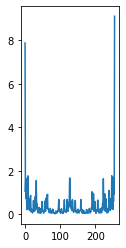

In [ ]:
#-------------------------------
# 1.3 LBP HISTOGRAM
#-------------------------------

#img = cv2.imread('/content/featureextraction/imsynth.bmp',cv2.IMREAD_GRAYSCALE) # read the image
img = cv2.imread('/content/featureextraction/sea1.jpg',cv2.IMREAD_GRAYSCALE) # read the image
img = cv2.imread('/content/featureextraction/forest1.jpg',cv2.IMREAD_GRAYSCALE) # read the image
img_lbp=lbp(img)

h = histo(img_lbp)
plt.subplot(1,3,3),plt.plot(h)
plt.show()


It is time to verify if the patterns you have imagined for forest and sea (see question in section 1.2) are the correct ones. To have a better understanding of the patterns, let's draw them in next subsection. 

## <span style="border-bottom: double 5px #7db4e6; color: #494949;">1.4 Understand an image via LBP</span>

To have a better understanding of the result, analyse the patterns that often appear (you migth want to change the threshold to get the most frequent patterns).

Let's use your visualisation tool (section 1.1).



In [ ]:
#-------------------------------
# 1.4 UNDERSTAND AN IMAGE VIA LBP: MAIN PATTERNS OF THE IMAGE
#-------------------------------
#img = cv2.imread('/content/featureextraction/imsynth.bmp',cv2.IMREAD_GRAYSCALE) # read the image
#img = cv2.imread('/content/featureextraction/sea2.jpg',cv2.IMREAD_GRAYSCALE) # read the image
img = cv2.imread('/content/featureextraction/forest1.jpg',cv2.IMREAD_GRAYSCALE) # read the image
img_lbp=lbp(img)
h = histo(img_lbp)

threshold_pattern = 1.5
for i in range (0, 256):
    if h[i]>threshold_pattern:
        print("Pattern " + str(i) + " with " + str(h[i]) + " %")
        print(pattern(i))

Pattern 0 with [7.88530466] %
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Pattern 2 with [1.66656542] %
[[0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Pattern 8 with [1.7738898] %
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
Pattern 32 with [1.55924103] %
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]]
Pattern 127 with [1.67061539] %
[[1. 1. 1.]
 [0. 0. 1.]
 [1. 1. 1.]]
Pattern 128 with [1.67669036] %
[[0. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]
Pattern 223 with [1.64024057] %
[[1. 1. 1.]
 [1. 0. 1.]
 [1. 0. 1.]]
Pattern 247 with [1.77793978] %
[[1. 1. 1.]
 [1. 0. 0.]
 [1. 1. 1.]]
Pattern 253 with [1.7050402] %
[[1. 0. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Pattern 255 with [9.11447259] %
[[1. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]


Do you now understand why those patterns are the most frequent in your image?

[Go to one solution](#solution_1_4)
<a name="back_1_4"></a>

# <span style="padding: 0.4em 0.5em; color: #494949; background: #f4f4f4; border-left: solid 5px #7db4e6; border-bottom: solid 3px #d7d7d7;">2. Cluster a set of images</span>

In this section, you will apply LBP feature extraction on many images to analyse them. 

We will choose grey-level images of the sea and of forests. Find such images on the net (at least 5 of each type) and fullfill the variable listFiles or use those that we have made available.



In [ ]:
#-------------------------------
# 2.1 SEVERAL IMAGES
#-------------------------------
listFiles = ['/content/featureextraction/forest1.jpg', '/content/featureextraction/sea2.jpg', '/content/featureextraction/forest2.jpg',  '/content/featureextraction/sea4.jpg', '/content/featureextraction/forest4.jpg', '/content/featureextraction/forest5.jpg', '/content/featureextraction/forest6.jpg','/content/featureextraction/forest3.jpg',  '/content/featureextraction/forest7.jpg', '/content/featureextraction/sea1.jpg',  '/content/featureextraction/sea3.jpg',  '/content/featureextraction/sea5.jpeg', '/content/featureextraction/sea6.jpeg', '/content/featureextraction/sea7.jpg']
nbFiles = len(listFiles)
print("We will analyse " + str(nbFiles) + " files.")

We will analyse 14 files.


## <span style="border-bottom: double 5px #7db4e6; color: #494949;">2.1. Many images: visualization</span>

The first step is to get LBP histogram from those images and visualize the results.

The image number 0 is 281 pixels wide and 179 pixels high.
The image number 1 is 265 pixels wide and 190 pixels high.
The image number 2 is 612 pixels wide and 467 pixels high.
The image number 3 is 1550 pixels wide and 804 pixels high.
The image number 4 is 1800 pixels wide and 1198 pixels high.
The image number 5 is 750 pixels wide and 500 pixels high.
The image number 6 is 312 pixels wide and 162 pixels high.
The image number 7 is 960 pixels wide and 640 pixels high.
The image number 8 is 310 pixels wide and 162 pixels high.
The image number 9 is 259 pixels wide and 194 pixels high.
The image number 10 is 275 pixels wide and 184 pixels high.
The image number 11 is 1000 pixels wide and 638 pixels high.
The image number 12 is 275 pixels wide and 183 pixels high.
The image number 13 is 1300 pixels wide and 866 pixels high.


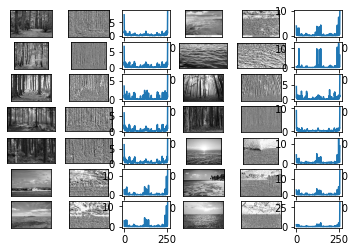

In [ ]:
hist_matrix = np.zeros((nbFiles, 256))
line = nbFiles//2
hist_matrix = np.zeros((nbFiles, 256))

for f in range (0,nbFiles):
    i = f//2
    j = f%2
    img = cv2.imread(listFiles[f],cv2.IMREAD_GRAYSCALE)
    print("The image number " + str(f) + " is " + str(len(img[0])) + " pixels wide and " + str(len(img)) + " pixels high.")
    plt.subplot(line,3*2,i*3*2+3*j+1),plt.imshow(img, cmap = 'gray'), plt.xticks([]), plt.yticks([])
    img_lbp=lbp(img)
    plt.subplot(line,3*2,i*3*2+3*j+2),plt.imshow(img_lbp, cmap = 'gray'), plt.xticks([]), plt.yticks([])
    h = histo(img_lbp).flatten()
    hist_matrix[f]= h
    plt.subplot(line,3*2,i*3*2+3*j+3),plt.plot(h)

<!--[Go to one solution](#solution_2_1)
<a name="back_2_1"></a>-->

What do you observe?

## <span style="border-bottom: double 5px #7db4e6; color: #494949;">2.2. Comparison of LBP histograms</span>

Before applying automatic clustering methods, we can compare the distances between the images (more precisely between the various LBP histograms).

Run the following code and analyse the results:



In [ ]:
#-------------------------------
# 2.2 COMPARISON OF LBP HISTOGRAMS
#-------------------------------
dist_matrix = np.zeros((len(hist_matrix), len(hist_matrix)))
for i in range (0,len(hist_matrix)):
    for j in range (i+1,len(hist_matrix)):
        dist_matrix[i][j] = int(np.sum(np.absolute(hist_matrix[i]-hist_matrix[j])))
print(dist_matrix)

[[  0.  71.  26. 123.  60.  40.  31.  23.  30.  81.  82.  71.  86.  90.]
 [  0.   0.  68.  77.  64.  73.  74.  85.  79.  34.  25.  29.  26.  47.]
 [  0.   0.   0. 113.  37.  23.  18.  47.  21.  81.  76.  64.  82.  88.]
 [  0.   0.   0.   0.  98. 115. 119. 135. 121.  74.  71.  82.  68.  88.]
 [  0.   0.   0.   0.   0.  35.  42.  78.  48.  76.  68.  54.  72.  81.]
 [  0.   0.   0.   0.   0.   0.  20.  58.  25.  87.  82.  69.  87.  91.]
 [  0.   0.   0.   0.   0.   0.   0.  51.  17.  87.  84.  73.  88.  91.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  47.  93.  94.  83.  97. 103.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  91.  86.  76.  92.  97.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  36.  40.  31.  61.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  27.  22.  42.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  29.  40.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  45.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.

[Go to one solution](#solution_2_2)
<a name="back_2_2"></a>

>**Feature extraction is a key part of the process. The most relevant the feature for the task, the better.**


## <span style="border-bottom: double 5px #7db4e6; color: #494949;">2.3. Automatic Clustering</span>

As you notice previously, LBP histogram from forest images are rather different than LBP histogram of sea images.

Use k-means clustering to get 2 clusters and verify that one cluster get the forest images and the other one the sea images:

In [ ]:
#-------------------------------
# 2.3 AUTOMATIC CLUSTERING
#-------------------------------
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
z = hist_matrix
z = np.float32(z)
print(z.shape)
compactness,labels,centers=cv2.kmeans(z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
print(labels.shape)
print(centers.shape)
print(labels)

print("Cluster 1: ")
for f in range (0,nbFiles):
    if labels[f]==0:
        print(listFiles[f])
print("Cluster 2: ")
for f in range (0,nbFiles):
    if labels[f]==1:
        print(listFiles[f])

(14, 256)
(14, 1)
(2, 256)
[[1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
Cluster 1: 
/content/featureextraction/sea2.jpg
/content/featureextraction/sea4.jpg
/content/featureextraction/sea1.jpg
/content/featureextraction/sea3.jpg
/content/featureextraction/sea5.jpeg
/content/featureextraction/sea6.jpeg
/content/featureextraction/sea7.jpg
Cluster 2: 
/content/featureextraction/forest1.jpg
/content/featureextraction/forest2.jpg
/content/featureextraction/forest4.jpg
/content/featureextraction/forest5.jpg
/content/featureextraction/forest6.jpg
/content/featureextraction/forest3.jpg
/content/featureextraction/forest7.jpg


[Go to one solution](#solution_2_3)
<a name="back_2_3"></a>

# 3. Conclusion

If we keep the LBP code and k-means, we obtain:

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy

listFiles = ['/content/featureextraction/forest1.jpg', '/content/featureextraction/sea2.jpg', '/content/featureextraction/forest2.jpg',  '/content/featureextraction/sea4.jpg', '/content/featureextraction/forest4.jpg', '/content/featureextraction/forest5.jpg', '/content/featureextraction/forest6.jpg','/content/featureextraction/forest3.jpg',  '/content/featureextraction/forest7.jpg', '/content/featureextraction/sea1.jpg',  '/content/featureextraction/sea3.jpg',  '/content/featureextraction/sea5.jpeg', '/content/featureextraction/sea6.jpeg', '/content/featureextraction/sea7.jpg']

def lbp (img) :
    img_lbp = np.zeros((len(img)-2, len(img[0])-2))
    for i in range (1, len(img)-1):
        for j in range(1, len(img[0])-1):
            val = 0
            if (img[i-1][j-1]>=img[i][j]): val = val+2**0
            if (img[i-1][j]>=img[i][j]): val = val+2**1
            if (img[i-1][j+1]>=img[i][j]): val = val+2**2
            if (img[i][j-1]>=img[i][j]): val = val+2**7
            if (img[i][j+1]>=img[i][j]): val = val+2**3
            if (img[i+1][j-1]>=img[i][j]): val = val+2**6
            if (img[i+1][j]>=img[i][j]): val = val+2**5
            if (img[i+1][j+1]>=img[i][j]): val = val+2**4
            img_lbp[i-1][j-1] = val
    return img_lbp

# Feature extraction
hist_matrix = np.zeros((nbFiles, 256))
for f in range (0,nbFiles):
    i = f//2
    j = f%2
    img = cv2.imread(listFiles[f],cv2.IMREAD_GRAYSCALE)
    img_lbp=lbp(img)
    h = histo(img_lbp).flatten()
    hist_matrix[f]= h

# Clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
z = hist_matrix
z = np.float32(z)
compactness,labels,centers=cv2.kmeans(z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Display the results
print("Cluster 1: ")
for f in range (0,nbFiles):
    if labels[f]==0:
        print(listFiles[f])
print("Cluster 2: ")
for f in range (0,nbFiles):
    if labels[f]==1:
        print(listFiles[f])


Cluster 1: 
/content/featureextraction/forest1.jpg
/content/featureextraction/forest2.jpg
/content/featureextraction/forest4.jpg
/content/featureextraction/forest5.jpg
/content/featureextraction/forest6.jpg
/content/featureextraction/forest3.jpg
/content/featureextraction/forest7.jpg
Cluster 2: 
/content/featureextraction/sea2.jpg
/content/featureextraction/sea4.jpg
/content/featureextraction/sea1.jpg
/content/featureextraction/sea3.jpg
/content/featureextraction/sea5.jpeg
/content/featureextraction/sea6.jpeg
/content/featureextraction/sea7.jpg


<b>Conclusion</b><p>
>You can notice that with a simple feature extractor (such as LBP), an automatic system can cluster (no labelled data) some images into several clusters. Of course, this example performs well because those 2 types of images are very different. Let's look at a more generic process using <b>Transfer Learning</b> for the feature extraction task.

# <span style=" display: block; text-align: center; color: #FFFFFF; padding: 0.4em 0.5em;background: #303030;">  Solutions </span>

<a name="solution_1"></a>
## 1.1 Plot a LBP pattern

In [ ]:
#-------------------------------
# FUNCTIONS
#-------------------------------
# 1.1 Plot a pattern (i value is between 0 and 255)
def pattern (i) :
    pattern_matrix = np.zeros((3,3))
    pattern_matrix[0][0]=i%2
    i = i // 2
    pattern_matrix[0][1]=i%2
    i = i // 2
    pattern_matrix[0][2]=i%2
    i = i // 2
    pattern_matrix[1][2]=i%2
    i = i // 2
    pattern_matrix[2][2]=i%2
    i = i // 2
    pattern_matrix[2][1]=i%2
    i = i // 2
    pattern_matrix[2][0]=i%2
    i = i // 2
    pattern_matrix[1][0]=i%2
    return pattern_matrix

[Back.](#back_1)


<a name="solution_1_1"></a>
## 1.1 Plot a LBP pattern (bis)

Write down your propositions. We will discuss this part later :).

[Back.](#back_1_1)

<a name="solution_1_2"></a>
## 1.2. LBP computation

In [ ]:
# 1.2 LBP computation on an image
def lbp (img) :
    img_lbp = np.zeros((len(img)-2, len(img[0])-2))
    for i in range (1, len(img)-1):
        for j in range(1, len(img[0])-1):
            val = 0
            if (img[i-1][j-1]>=img[i][j]): val = val+2**0
            if (img[i-1][j]>=img[i][j]): val = val+2**1
            if (img[i-1][j+1]>=img[i][j]): val = val+2**2
            if (img[i][j-1]>=img[i][j]): val = val+2**7
            if (img[i][j+1]>=img[i][j]): val = val+2**3
            if (img[i+1][j-1]>=img[i][j]): val = val+2**6
            if (img[i+1][j]>=img[i][j]): val = val+2**5
            if (img[i+1][j+1]>=img[i][j]): val = val+2**4
            img_lbp[i-1][j-1] = val
    return img_lbp


[Back.](#back_1_2)
<a name="solution_1_2b"></a>

We can't really see "edges" for the truncs of the trees for instance. This is 
due to many reasons. One of them is that patterns that are near one to each  other do not especially have a close value. These are two patterns that are not that different but the 2 corresponding values are (193 and 65):

In [ ]:
patternNumber1 = 1+128+64
patternNumber2 = 1+64
print("")
print("The pattern for " + str(patternNumber1) + " is:")
print(pattern(patternNumber1))
print("The pattern for " + str(patternNumber2) + " is:")
print(pattern(patternNumber2))


The pattern for 193 is:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
The pattern for 65 is:
[[1. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]


This is not the only reason. We will see another one later.

Note that this is not the case for the synthetic image, for it has been made to have "perfect" lines (no noise, ...) ;).

One last thing: there exists an extension to LBP computation, that groups in the same beans, patterns that are quite similar. We won't use/code it for this applied course, for LBP is not the main goal for the course.

[Back.](#back_1_2b)

<a name="solution_1_3"></a>
## 1.3. Histogram of LBP patterns

In [ ]:
# 1.3 Histogram computation
def histo (img) :
    valhisto = np.zeros((256,1))
    size = len(img)*len(img[0])
    for i in range (0, len(img)):
        for j in range(0, len(img[0])):
            #print(int(img[i][j]))
            valhisto[int(img[i][j])]+=1
    return valhisto*100/size

[Back.](#back_1_3)

<a name="solution_1_4"></a>
## 1.4 Understand an image via LBP

It can be suprising not to get pattern of vertical edges for the forest image. It is due to the fact that LBP is LOCAL. And locally, if you look at the forest images, you don't have "edges". You will have the leaves, the tree bark, moss on the ground, ... 

On the other hand, for the sea image, it seems to be horizontal edges that appears.

Yet, what is interesting is to verify if those patterns are the same for each image of forest and each image of sea! If that is the case, that means that those patterns are relevant for forests / sea and that we can differenciate them! 

[Back.](#back_1_4)

<a name="solution_2_1"></a>
## 2.1. Many images: visualization

The image number 0 is 281 pixels wide and 179 pixels high.
The image number 1 is 265 pixels wide and 190 pixels high.
The image number 2 is 612 pixels wide and 467 pixels high.
The image number 3 is 1550 pixels wide and 804 pixels high.
The image number 4 is 1800 pixels wide and 1198 pixels high.
The image number 5 is 750 pixels wide and 500 pixels high.
The image number 6 is 312 pixels wide and 162 pixels high.
The image number 7 is 960 pixels wide and 640 pixels high.
The image number 8 is 310 pixels wide and 162 pixels high.
The image number 9 is 259 pixels wide and 194 pixels high.
The image number 10 is 275 pixels wide and 184 pixels high.
The image number 11 is 1000 pixels wide and 638 pixels high.
The image number 12 is 275 pixels wide and 183 pixels high.
The image number 13 is 1300 pixels wide and 866 pixels high.


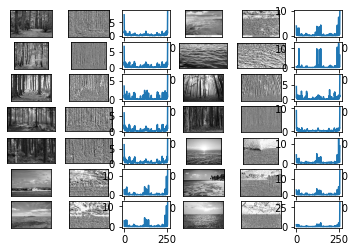

In [ ]:
hist_matrix = np.zeros((nbFiles, 256))
line = nbFiles//2
hist_matrix = np.zeros((nbFiles, 256))

for f in range (0,nbFiles):
    i = f//2
    j = f%2
    img = cv2.imread(listFiles[f],cv2.IMREAD_GRAYSCALE)
    print("The image number " + str(f) + " is " + str(len(img[0])) + " pixels wide and " + str(len(img)) + " pixels high.")
    plt.subplot(line,3*2,i*3*2+3*j+1),plt.imshow(img, cmap = 'gray'), plt.xticks([]), plt.yticks([])
    img_lbp=lbp(img)
    plt.subplot(line,3*2,i*3*2+3*j+2),plt.imshow(img_lbp, cmap = 'gray'), plt.xticks([]), plt.yticks([])
    h = histo(img_lbp).flatten()
    hist_matrix[f]= h
    plt.subplot(line,3*2,i*3*2+3*j+3),plt.plot(h)

[Back.](#back_2_1)

<a name="solution_2_2"></a>
## 2.2. Comparison of LBP histograms

You should notice a higher distance between forest and sea image than betweeen image of the same "label".

>LBP is one example of relevant feature.


[Back.](#back_2_2)

<a name="solution_2_3"></a>
## 2.3. Automatic Clustering

In [ ]:
#-------------------------------
# 2.3 AUTOMATIC CLUSTERING
#-------------------------------
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
z = hist_matrix
z = np.float32(z)
print(z.shape)
compactness,labels,centers=cv2.kmeans(z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
print(labels.shape)
print(centers.shape)
print(labels)

print("Cluster 1: ")
for f in range (0,nbFiles):
    if labels[f]==0:
        print(listFiles[f])
print("Cluster 2: ")
for f in range (0,nbFiles):
    if labels[f]==1:
        print(listFiles[f])

(14, 256)
(14, 1)
(2, 256)
[[1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]]
Cluster 1: 
/content/featureextraction/sea2.jpg
/content/featureextraction/sea4.jpg
/content/featureextraction/sea1.jpg
/content/featureextraction/sea3.jpg
/content/featureextraction/sea6.jpeg
Cluster 2: 
/content/featureextraction/forest1.jpg
/content/featureextraction/forest2.jpg
/content/featureextraction/forest4.jpg
/content/featureextraction/forest5.jpg
/content/featureextraction/forest6.jpg
/content/featureextraction/forest3.jpg
/content/featureextraction/forest7.jpg
/content/featureextraction/sea5.jpeg
/content/featureextraction/sea7.jpg


[Back.](#back_2_3)